<a href="https://colab.research.google.com/github/Pakabudu/Correlation-analysis-with-Python/blob/main/Correlation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First I import the packages I will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# **Reading the csv File**

In [ ]:
# Now we need the file
movies=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies.csv')

# **Getting the Number of Rows and Columns**

In [ ]:
rows = movies.shape[0]
columns = movies.shape[1]

print('This data set contains  {} rows and {} columns.'.format(rows,columns))

This data set contains  7668 rows and 15 columns.


## **Taking a Look at the Full Dataset**

In [ ]:
#lets see what the data looks like 
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# **Lets take a look at the column names**

In [ ]:
for col in movies.columns:
  print(col)

name
rating
genre
year
released
score
votes
director
writer
star
country
budget
gross
company
runtime


# **Taking a look at the first 20 rows**

In [ ]:
movies.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


# **Checking for Null Values**

In [ ]:
movies.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False
7664,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
7665,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
7666,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False


# **Displaying the Sum of Null Values per Column**

In [ ]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

# **Displaying the Percentage of Null Values per Column**

In [ ]:
#Now we check to see if there is any missing data
for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


## **Dropping Null Values**

In [ ]:
movies = movies.dropna()
movies.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## **Displaying the Total Number of Unique Values per Column**

In [ ]:
Unique_counts = movies.nunique()
Unique_counts

name        5336
rating        10
genre         15
year          41
released    2560
score         72
votes        717
director    2063
writer      3205
star        1845
country       50
budget       398
gross       5418
company     1475
runtime      127
dtype: int64

## **Displaying Unique Values and Number of Occurrences for "Genre" Column**

In [ ]:
movies['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

# **Displaying the data types**

In [ ]:
#now we investigate the data types for each column 

print(movies.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


# **Changing Some Data Types**

In [ ]:
movies['budget'] = movies['budget'].astype('int64')
movies['gross'] = movies['gross'].astype('int64')

## **Dropping Duplicates**

In [ ]:
#now we need to drop duplicates 

movies.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


# **Description of Numerical Columns**

In [ ]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


# **Sorting the Dataframe by Gross in Descending Order**

In [ ]:
#Now we need to order the data a little bit 

movies.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


## **Boxplot for the "Gross" Column to Identify the Outliers**

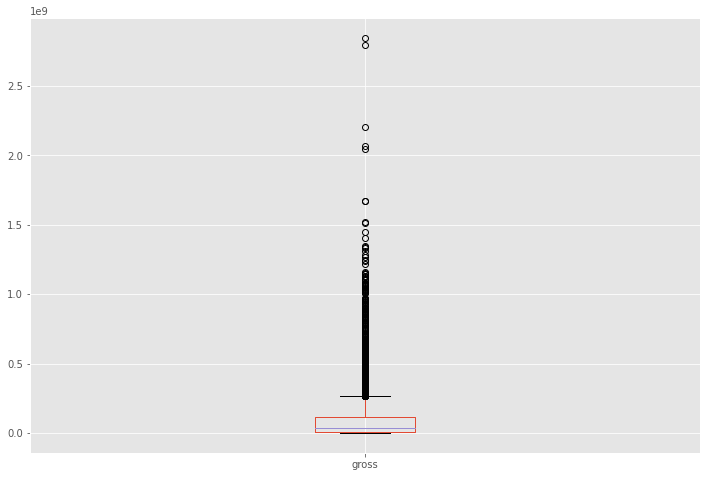

In [ ]:
movies.boxplot(column=['gross'])

# **Grouping Movie Name by Gross Value in Descending Order (Top 5 Values)**

In [ ]:
movies1 = movies.groupby(['name'], as_index= False, sort = False)['gross'].sum().sort_values('gross', inplace = False, ascending = False).head(5) 
movies1

,name,gross
3710,Avatar,2847246203
5228,Avengers: Endgame,2797501328
1386,The Lion King,2754448457
1793,Titanic,2201647264
4676,Star Wars: Episode VII - The Force Awakens,2069521700


# **Visualizing the Top 5 Movies by Gross**

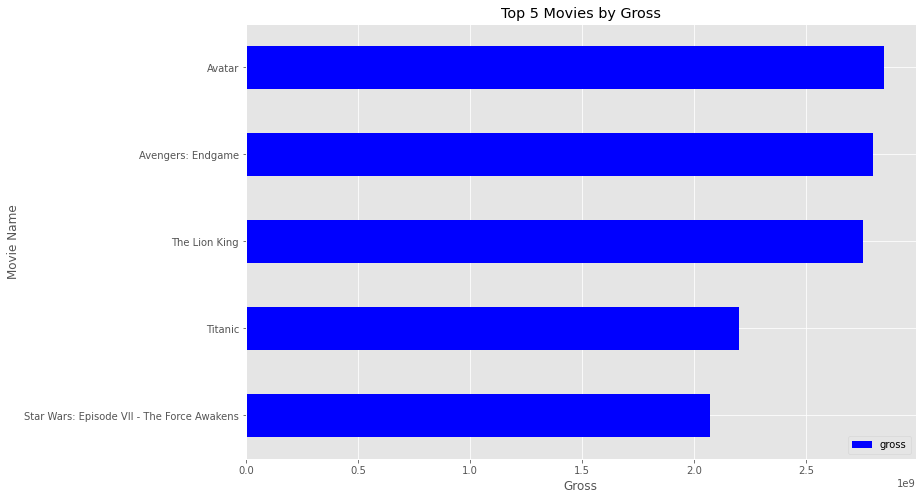

In [ ]:
movies1.sort_values('gross', inplace = True)
movies1.plot(kind='barh',y='gross', x='name', color='blue')
plt.title('Top 5 Movies by Gross')
plt.xlabel('Gross')
plt.ylabel('Movie Name')
plt.show()

# **Grouping Directors by Number of Movies in Descending Order (Top 5 Values)**

In [ ]:
movies2 = movies.groupby(['director'], as_index= False, sort = False)['name'].count().sort_values('name', inplace = False, ascending = False).head(5) 
movies2

,director,name
31,Woody Allen,33
33,Clint Eastwood,31
40,Steven Spielberg,27
429,Steven Soderbergh,23
100,Ridley Scott,23


# **Visualizing the Top 5 Directors by Number of Movies**

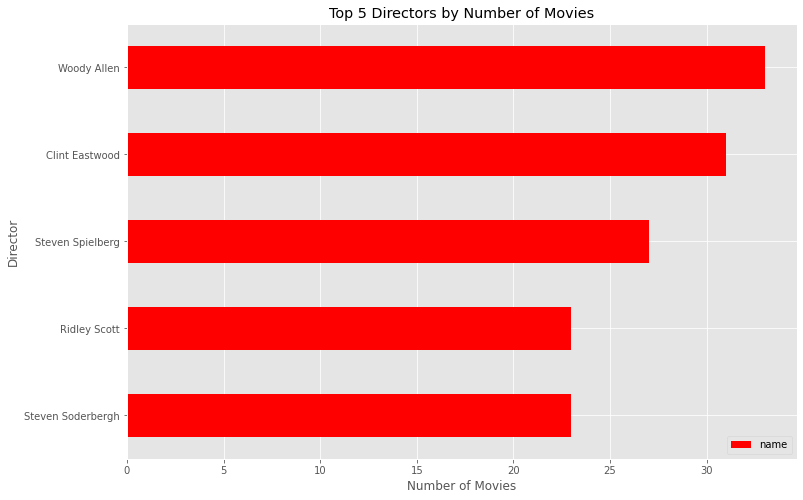

In [ ]:
movies2.sort_values('name', inplace = True)
movies2.plot(kind='barh',y='name', x='director', color='red')
plt.title('Top 5 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

# **Visualizing the Top 5 Companis by Number of Movies**

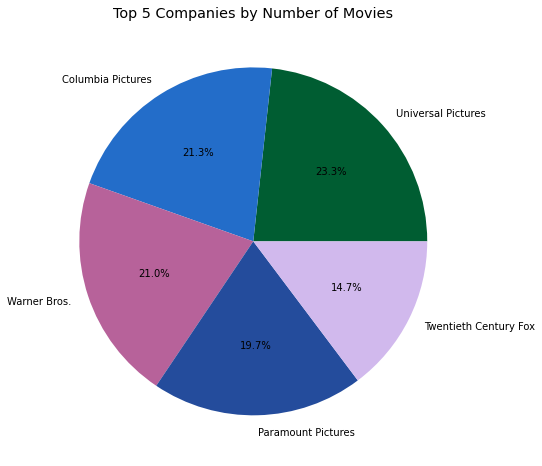

In [ ]:
movies3 = movies.groupby(['company'], as_index=False, sort=False)['name'].count().sort_values('name', inplace = False, ascending = False).head(5)
labels = movies3['company']
colors = [ '#005D32', '#236DC9', '#b7629a', '#244C9C', '#D1B9ED', '#FFBF00']
plt.pie(movies3['name'], labels = labels, colors = colors, autopct='%.1f%%')
plt.title("Top 5 Companies by Number of Movies")
plt.show()

# **Budget vs Gross Scatter Plot with trendline**

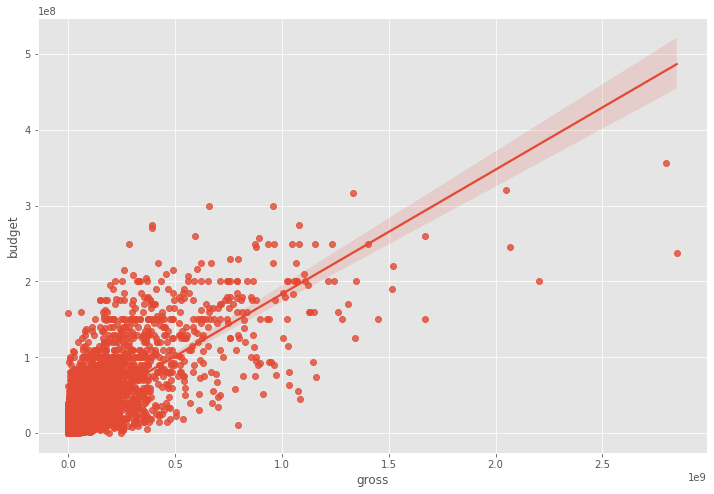

In [ ]:
#Now we plot a plot data and a linear regression model fit between the budget of the movies and their gross using seaborn regplot

sns.regplot(x="gross", y="budget", data=movies)

# **Gross vs Score Scatter Plot with trendline**

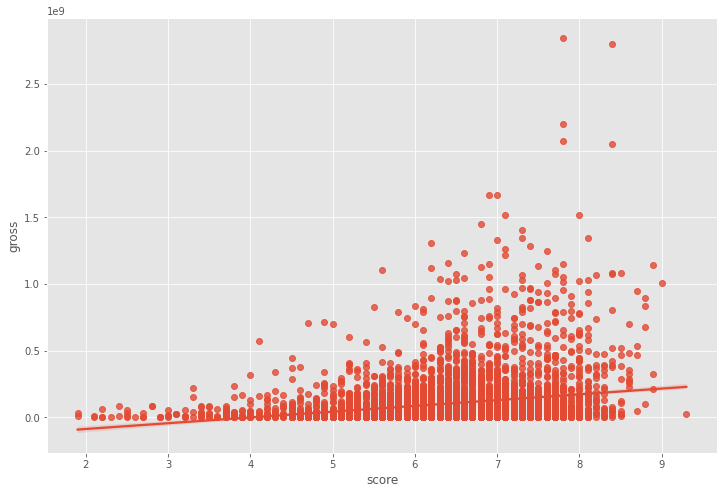

In [ ]:
#Now we plot a plot data and a linear regression model fit between the score of the movies and their gross using seaborn regplot
sns.regplot(x='score' ,y= 'gross', data= movies)

## **Correlation Matrixes for Numerical Columns using different methods**

## **Pearson method**

In [ ]:
#Now we create a correlation matrix between all numeric columns using the Pearson Method

movies.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


# **Kendall Method**

In [ ]:
#Now we create a correlation matrix between all numeric columns using the Kendall Method

movies.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


## **Spearman Method**

In [ ]:
#Now we create a correlation matrix between all numeric columns using the Spearman Method

movies.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


# **Heat Map for Numerical Columns**

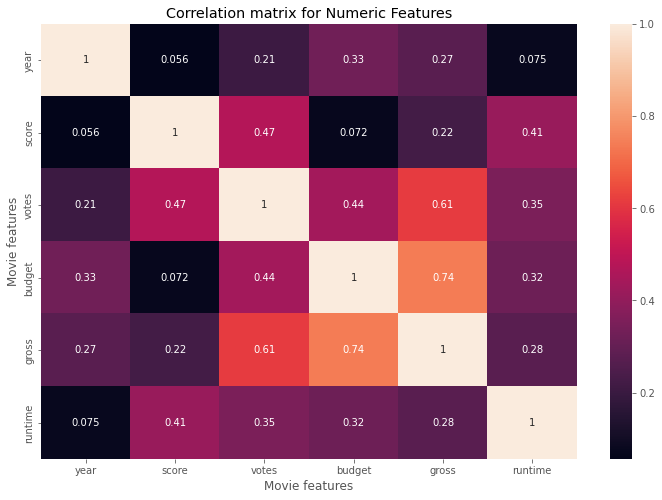

In [ ]:
correlation_matrix = movies.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

# Correlation Matrix for all Columns (Including Non-Numerical)

In [ ]:
# Using factorize - this assigns a random numeric value for each unique categorical value

movies.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.169808,0.028413,0.965461,0.966086,-0.020083,0.297305,0.725411,0.791872,0.695124,0.098110,0.288955,0.967925,0.535369,0.048980
rating,0.169808,1.000000,-0.116507,0.179456,0.171063,0.036114,0.097619,0.096014,0.128909,0.115694,-0.004547,0.203698,0.172703,-0.026286,0.032265
genre,0.028413,-0.116507,1.000000,0.031765,0.031251,-0.027402,-0.009983,0.036671,0.033975,0.045497,-0.003314,0.020893,0.032033,0.015127,0.000056
year,0.965461,0.179456,0.031765,1.000000,0.996490,-0.014594,0.323916,0.747785,0.812386,0.719373,0.095073,0.319135,0.996371,0.537731,0.055864
released,0.966086,0.171063,0.031251,0.996490,1.000000,-0.019486,0.313254,0.750825,0.809858,0.720076,0.096807,0.309616,0.998490,0.546033,0.049650
score,-0.020083,0.036114,-0.027402,-0.014594,-0.019486,1.000000,-0.041981,-0.006583,-0.021538,0.015108,0.016567,-0.005493,-0.015744,-0.008555,0.011831
votes,0.297305,0.097619,-0.009983,0.323916,0.313254,-0.041981,1.000000,0.187909,0.225105,0.182043,-0.021562,0.359065,0.307248,0.007423,0.126362
director,0.725411,0.096014,0.036671,0.747785,0.750825,-0.006583,0.187909,1.000000,0.717990,0.636705,0.095349,0.124051,0.751737,0.483737,-0.026918
writer,0.791872,0.128909,0.033975,0.812386,0.809858,-0.021538,0.225105,0.717990,1.000000,0.626647,0.098623,0.208088,0.811356,0.477503,0.023123
star,0.695124,0.115694,0.045497,0.719373,0.720076,0.015108,0.182043,0.636705,0.626647,1.000000,0.098071,0.138015,0.720811,0.442307,0.033297


# **Heat Map for all Columns**

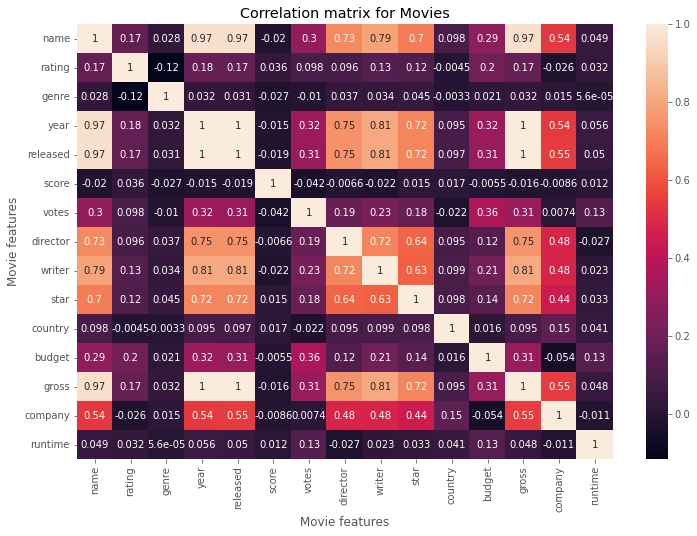

In [ ]:
correlation_matrix = movies.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

# **Correlation Pairs**

In [ ]:
correlation_mat = movies.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.169808
         genre       0.028413
         year        0.965461
         released    0.966086
                       ...   
runtime  country     0.040813
         budget      0.134894
         gross       0.047728
         company    -0.010695
         runtime     1.000000
Length: 225, dtype: float64


In [ ]:
print(corr_pairs.to_string())

name      name        1.000000
          rating      0.169808
          genre       0.028413
          year        0.965461
          released    0.966086
          score      -0.020083
          votes       0.297305
          director    0.725411
          writer      0.791872
          star        0.695124
          country     0.098110
          budget      0.288955
          gross       0.967925
          company     0.535369
          runtime     0.048980
rating    name        0.169808
          rating      1.000000
          genre      -0.116507
          year        0.179456
          released    0.171063
          score       0.036114
          votes       0.097619
          director    0.096014
          writer      0.128909
          star        0.115694
          country    -0.004547
          budget      0.203698
          gross       0.172703
          company    -0.026286
          runtime     0.032265
genre     name        0.028413
          rating     -0.116507
        

# Sorted Correlation Pairs

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   genre     -0.116507
genre    rating    -0.116507
budget   company   -0.053573
company  budget    -0.053573
score    votes     -0.041981
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [ ]:
print(sorted_pairs.to_string())

rating    genre      -0.116507
genre     rating     -0.116507
budget    company    -0.053573
company   budget     -0.053573
score     votes      -0.041981
votes     score      -0.041981
score     genre      -0.027402
genre     score      -0.027402
runtime   director   -0.026918
director  runtime    -0.026918
rating    company    -0.026286
company   rating     -0.026286
country   votes      -0.021562
votes     country    -0.021562
writer    score      -0.021538
score     writer     -0.021538
name      score      -0.020083
score     name       -0.020083
released  score      -0.019486
score     released   -0.019486
gross     score      -0.015744
score     gross      -0.015744
          year       -0.014594
year      score      -0.014594
runtime   company    -0.010695
company   runtime    -0.010695
votes     genre      -0.009983
genre     votes      -0.009983
company   score      -0.008555
score     company    -0.008555
          director   -0.006583
director  score      -0.006583
budget  

# Correlation Pairs Greater than 0.5

In [ ]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

company  name       0.535369
name     company    0.535369
company  year       0.537731
year     company    0.537731
gross    company    0.545924
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 65, dtype: float64


In [ ]:
print(strong_pairs.to_string())

company   name        0.535369
name      company     0.535369
company   year        0.537731
year      company     0.537731
gross     company     0.545924
company   gross       0.545924
released  company     0.546033
company   released    0.546033
star      writer      0.626647
writer    star        0.626647
director  star        0.636705
star      director    0.636705
          name        0.695124
name      star        0.695124
director  writer      0.717990
writer    director    0.717990
star      year        0.719373
year      star        0.719373
released  star        0.720076
star      released    0.720076
          gross       0.720811
gross     star        0.720811
director  name        0.725411
name      director    0.725411
director  year        0.747785
year      director    0.747785
director  released    0.750825
released  director    0.750825
director  gross       0.751737
gross     director    0.751737
writer    name        0.791872
name      writer      0.791872
writer  

## **Grouping Companies by Gross in Descending Order (Top 20 Values)**

In [ ]:
# Looking at the top 20 compaies by gross revenue

CompanyGrossSum = movies.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:20]



CompanyGrossSumSorted

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


# Grouping Companies by Gross and Year in Descending Order (Top 20 Values)

In [ ]:
movies.groupby(['company', 'year'])[["gross"]].sum().sort_values('gross', ascending = False)[:20]

,,gross
company,year,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071
Paramount Pictures,2011,3565705182
Warner Bros.,2011,3223799224
Walt Disney Pictures,2010,3104474158
Paramount Pictures,2014,3071298586


# **Grouping Companies by Gross Sum in Descending Order (Top 20 Values)**

In [ ]:
CompanyGrossSum = movies.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:20]

CompanyGrossSumSorted

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


# **Gross sum vs Budget** 

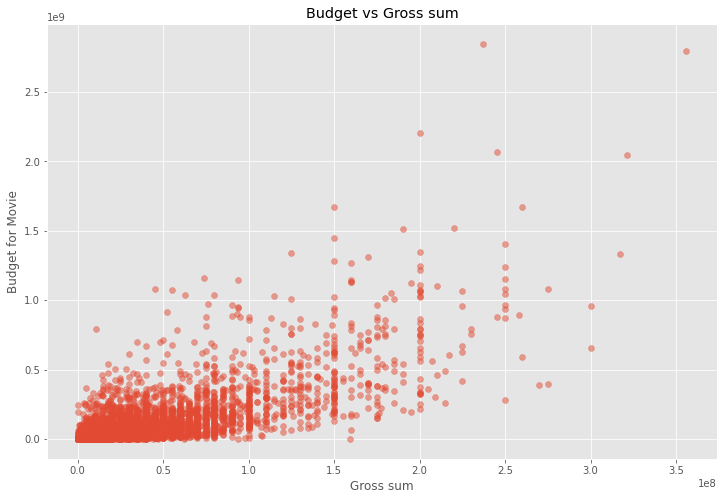

In [ ]:
plt.scatter(x=movies['budget'], y=movies['gross'], alpha=0.5)
plt.title('Budget vs Gross sum')
plt.xlabel('Gross sum')
plt.ylabel('Budget for Movie')
plt.show()

# **Gross vs Rating Swarmplot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; y

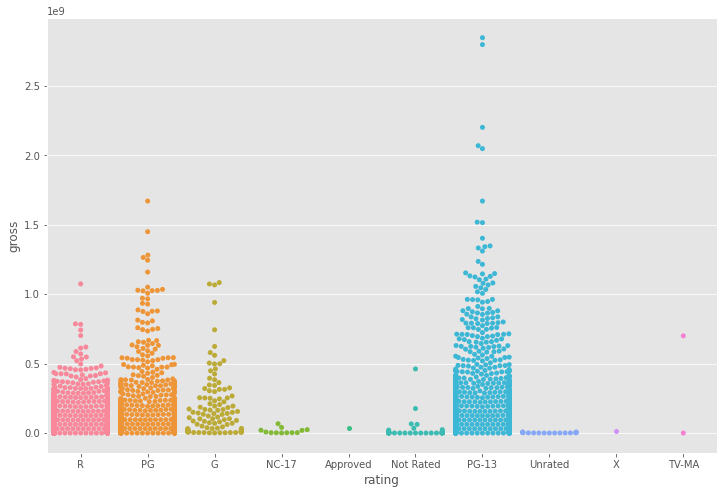

In [ ]:
sns.swarmplot(x="rating", y="gross", data=movies)

# **Gross vs Rating Stripplot**

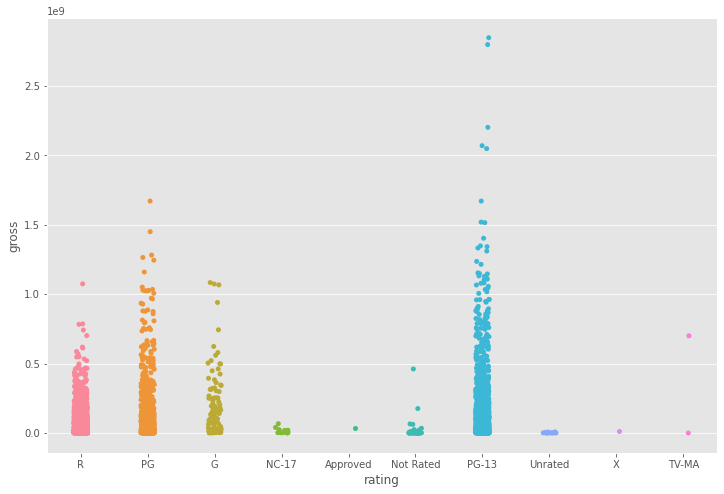

In [ ]:
sns.stripplot(x="rating", y="gross", data= movies)